In [3]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/Datset_NLP/MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400
...,...,...,...,...,...,...,...
9349,2023-04-18,291.570007,291.760010,287.010010,288.369995,288.369995,20161800
9350,2023-04-19,285.989990,289.049988,284.540009,288.450012,288.450012,17150300
9351,2023-04-20,285.250000,289.029999,285.079987,286.109985,286.109985,23244400
9352,2023-04-21,285.010010,286.269989,283.059998,285.760010,285.760010,21665400


In [4]:
df= df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9349,2023-04-18,288.369995
9350,2023-04-19,288.450012
9351,2023-04-20,286.109985
9352,2023-04-21,285.760010


In [5]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9349    2023-04-18
9350    2023-04-19
9351    2023-04-20
9352    2023-04-21
9353    2023-04-24
Name: Date, Length: 9354, dtype: object

In [6]:
import datetime

def str_to_datetime(s):
  split= s.split('-')
  year, month, day= int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year= year, month= month, day= day)

datetime_object= str_to_datetime('1986-03-13')
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [7]:
df['Date']= df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-74fa7e720c71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9349   2023-04-18
9350   2023-04-19
9351   2023-04-20
9352   2023-04-21
9353   2023-04-24
Name: Date, Length: 9354, dtype: datetime64[ns]

In [8]:
df.index= df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-04-18,288.369995
2023-04-19,288.450012
2023-04-20,286.109985


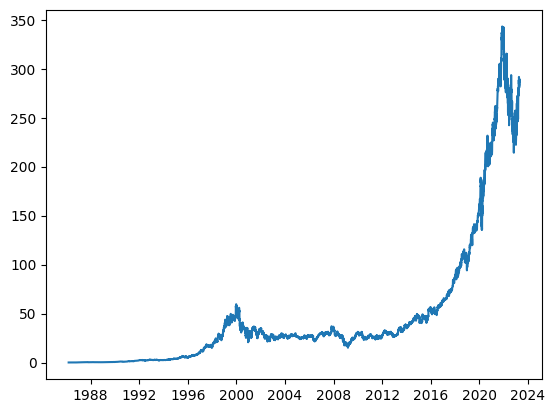

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2022-04-26'
windowed_df = df_to_windowed_df(df, 
                                '2022-04-26', 
                                '2023-04-24', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-04-26,280.809998,274.029999,280.720001,270.220001
1,2022-04-27,274.029999,280.720001,270.220001,283.220001
2,2022-04-28,280.720001,270.220001,283.220001,289.630005
3,2022-04-29,270.220001,283.220001,289.630005,277.519989
4,2022-05-02,283.220001,289.630005,277.519989,284.470001
...,...,...,...,...,...
245,2023-04-18,289.839996,286.140015,288.799988,288.369995
246,2023-04-19,286.140015,288.799988,288.369995,288.450012
247,2023-04-20,288.799988,288.369995,288.450012,286.109985
248,2023-04-21,288.369995,288.450012,286.109985,285.760010


In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((250,), (250, 3, 1), (250,))

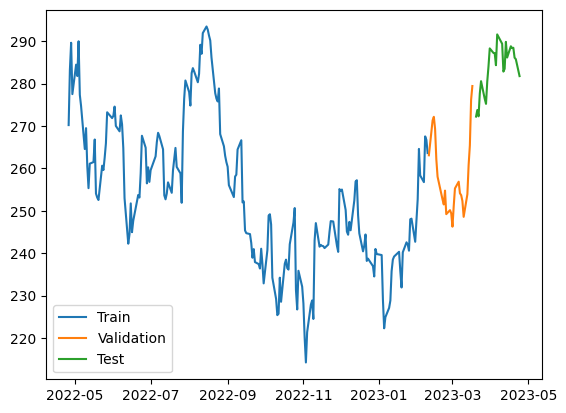

In [12]:
q_80= int(len(dates)*0.8)
q_90= int(len(dates)*0.9)

dates_train, X_train, y_train= dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val= dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test= dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model=Sequential([layers.Input((3,1)),
                  layers.LSTM(64),
                  layers.Dense(32, activation= 'relu'),
                  layers.Dense(32, activation= 'relu'),
                  layers.Dense(1)])

model.compile(loss='mse',
              optimizer= Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 106ms/step - loss: 64685.2734 - mean_absolute_error: 253.7416 - val_loss: 66634.8750 - val_mean_absolute_error: 257.9778
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 64480.0742 - mean_absolute_error: 253.3378 - val_loss: 66428.4609 - val_mean_absolute_error: 257.5774
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 64269.1914 - mean_absolute_error: 252.9194 - val_loss: 66194.9219 - val_mean_absolute_error: 257.1237
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 64031.1016 - mean_absolute_error: 252.4504 - val_loss: 65937.7969 - val_mean_absolute_error: 256.6232
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 63753.0234 - mean_absolute_error: 251.8987 - val_loss: 65594.2969 - val_mean_absolute_error: 255.9530
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 63382.1445 - mean_absolute_error: 251.1620 - val_loss: 65

7/7 [==============================] - 0s 3ms/step


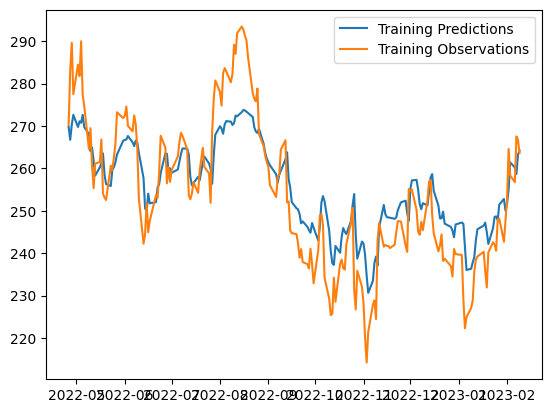

In [14]:
train_predictions= model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


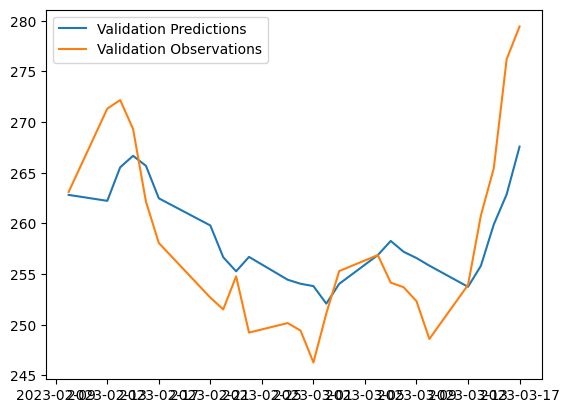

In [16]:
val_predictions= model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 23ms/step


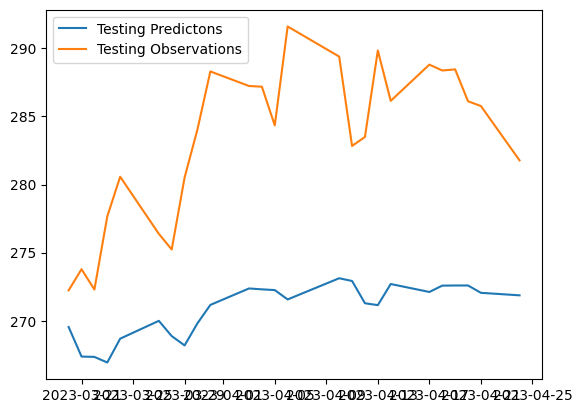

In [17]:
test_predictions= model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictons', 'Testing Observations'])

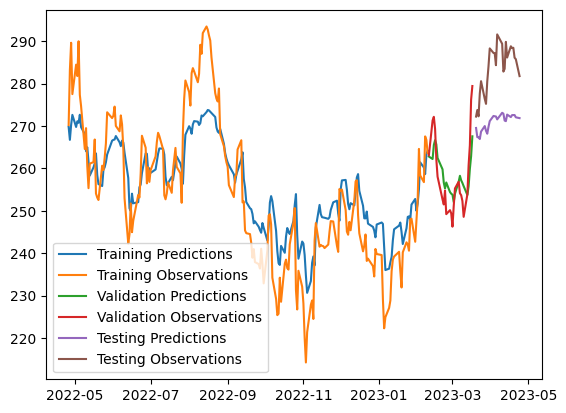

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [21]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 27ms/step


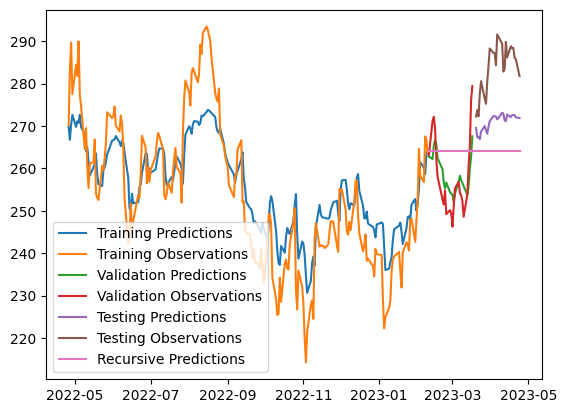

In [22]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])